### Importação dos dados



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento



In [2]:
import pandas as pd

pd.set_option("display.max_rows", None)

pd.set_option("display.max_columns", None)


In [3]:
import pandas as pd

dados = {
    "Produto": ["Assistente virtual", "Mesa de jantar", "Jogo de tabuleiro", "Micro-ondas", "Cadeira de escritório"],
    "Categoria do Produto": ["eletronicos", "moveis", "brinquedos", "eletrodomesticos", "moveis"],
    "Preço": [219.08, 256.35, 279.51, 1009.99, 446.99],
    "Frete": [9.249790, 11.234305, 21.262681, 54.667344, 26.964689],
    "Data da Compra": ["16/01/2021", "18/05/2022", "15/03/2021", "03/05/2022", "07/11/2020"],
    "Vendedor": ["Pedro Gomes", "Beatriz Moraes", "João Souza", "João Souza", "Larissa Alves"],
    "Local da compra": ["SP", "RJ", "DF", "RS", "MG"],
    "Avaliação da compra": [4, 1, 1, 4, 5],
    "Tipo de pagamento": ["cartao_credito", "cartao_credito", "cartao_credito", "boleto", "boleto"],
    "Quantidade de parcelas": [8, 4, 1, 1, 1],
    "lat": [-22.19, -22.25, -15.83, -30.17, -18.10],
    "lon": [-48.79, -42.66, -47.86, -53.50, -44.38]
}

df = pd.DataFrame(dados)


In [4]:
df["Faturamento"] = df["Preço"] + df["Frete"]



In [5]:
faturamento_total = df["Faturamento"].sum()
print("Faturamento Total:", faturamento_total)


Faturamento Total: 2335.298809


In [6]:
df["Faturamento"] = df["Preço"] + df["Frete"]

faturamento_total = df["Faturamento"].sum()
print("Faturamento Total:", faturamento_total)


Faturamento Total: 2335.298809


In [7]:
faturamento_produto = df.groupby("Produto")["Faturamento"].sum().to_frame(name="Quantidade de Vendas")
print(faturamento_produto)

                       Quantidade de Vendas
Produto                                    
Assistente virtual               228.329790
Cadeira de escritório            473.954689
Jogo de tabuleiro                300.772681
Mesa de jantar                   267.584305
Micro-ondas                     1064.657344


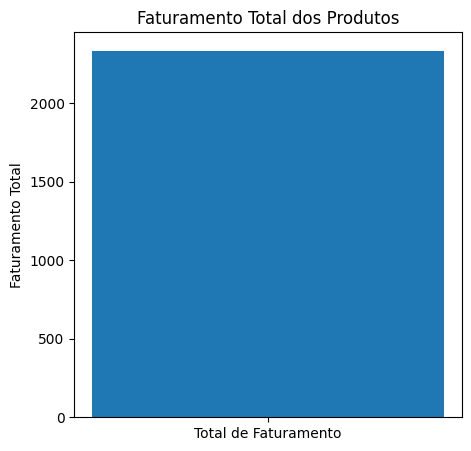

In [8]:
import matplotlib.pyplot as plt

dados = {"Total de Faturamento": faturamento_total}

plt.figure(figsize=(5,5))
plt.bar(dados.keys(), dados.values())
plt.ylabel("Faturamento Total")
plt.title("Faturamento Total dos Produtos")
plt.show()


# 2. Vendas por Categoria

In [9]:
vendas_por_categoria = df["Categoria do Produto"].value_counts()
print(vendas_por_categoria)


Categoria do Produto
moveis              2
eletronicos         1
brinquedos          1
eletrodomesticos    1
Name: count, dtype: int64


In [10]:
vendas_por_categoria = df["Categoria do Produto"].value_counts().to_frame(name="Quantidade de Vendas")
print(vendas_por_categoria)


                      Quantidade de Vendas
Categoria do Produto                      
moveis                                   2
eletronicos                              1
brinquedos                               1
eletrodomesticos                         1


In [11]:
vendas_por_categoria = df["Categoria do Produto"].value_counts()


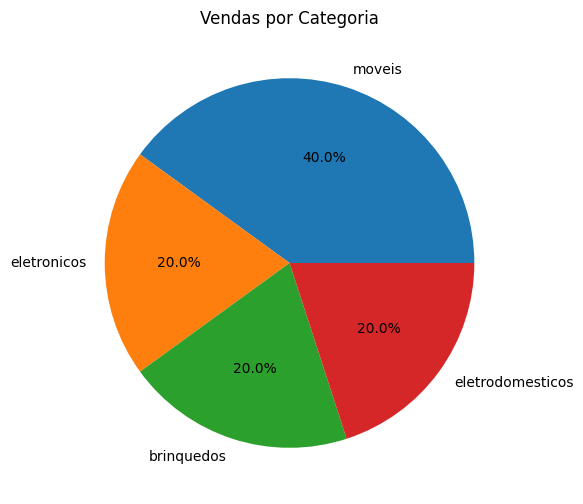

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.pie(
    vendas_por_categoria.values,
    labels=vendas_por_categoria.index,
    autopct="%1.1f%%"
)

plt.title("Vendas por Categoria")
plt.show()


# 3. Média de Avaliação das Lojas


In [16]:
media_avaliacao = df.groupby("Local da compra")["Avaliação da compra"].mean().to_frame(name="Quantidade de Vendas")
print(media_avaliacao)


                 Quantidade de Vendas
Local da compra                      
DF                                1.0
MG                                5.0
RJ                                1.0
RS                                4.0
SP                                4.0


In [18]:
vendas_categorias = df["Categoria do Produto"].value_counts()
top_categorias = vendas_categorias.head(10)
print(top_categorias)


Categoria do Produto
moveis              2
eletronicos         1
brinquedos          1
eletrodomesticos    1
Name: count, dtype: int64


In [21]:
vendas_produtos = df["Produto"].value_counts()
mais_vendido = vendas_produtos.idxmax()
print("Produto mais vendido:", mais_vendido)


Produto mais vendido: Assistente virtual


In [23]:
menos_vendido = vendas_produtos.idxmin()
print("Produto menos vendido:", menos_vendido)


Produto menos vendido: Assistente virtual


In [25]:
media_avaliacao = df.groupby("Local da compra")["Avaliação da compra"].mean()
print(media_avaliacao)


Local da compra
DF    1.0
MG    5.0
RJ    1.0
RS    4.0
SP    4.0
Name: Avaliação da compra, dtype: float64


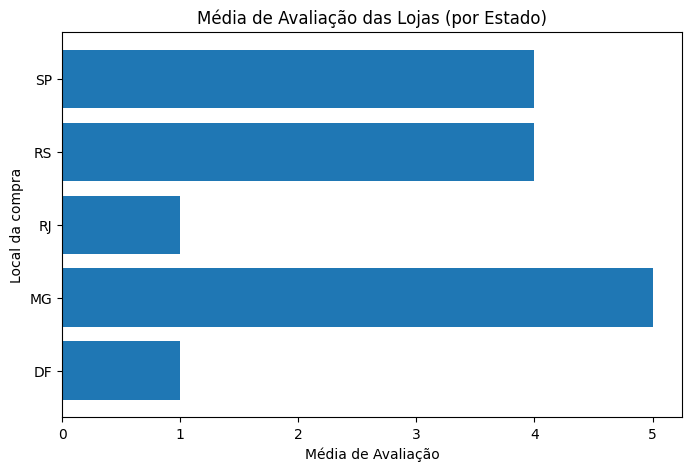

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.barh(media_avaliacao.index, media_avaliacao.values)
plt.xlabel("Média de Avaliação")
plt.ylabel("Local da compra")
plt.title("Média de Avaliação das Lojas (por Estado)")
plt.show()


# 4. Produtos Mais e Menos Vendidos

In [29]:
vendas_produtos = df["Produto"].value_counts()
print(vendas_produtos)


Produto
Assistente virtual       1
Mesa de jantar           1
Jogo de tabuleiro        1
Micro-ondas              1
Cadeira de escritório    1
Name: count, dtype: int64


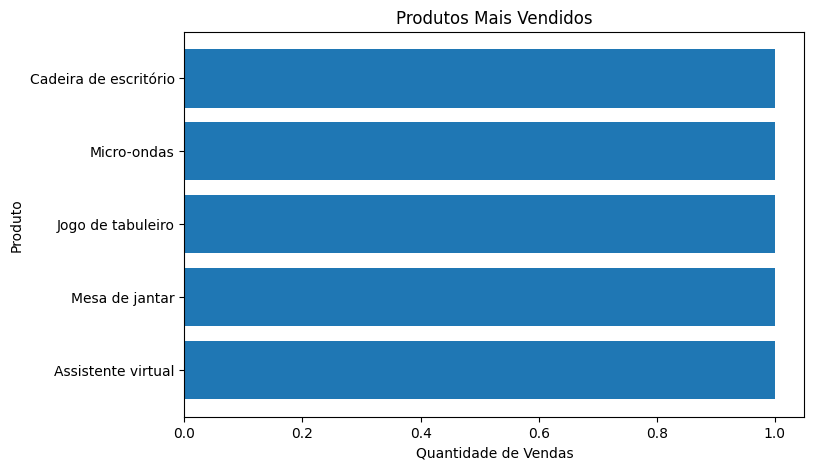

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.barh(vendas_produtos.index, vendas_produtos.values)
plt.xlabel("Quantidade de Vendas")
plt.ylabel("Produto")
plt.title("Produtos Mais Vendidos")
plt.show()


# 5. Frete Médio por Loja

In [31]:

frete_medio = df.groupby("Local da compra")["Frete"].mean()
print(frete_medio)


Local da compra
DF    21.262681
MG    26.964689
RJ    11.234305
RS    54.667344
SP     9.249790
Name: Frete, dtype: float64


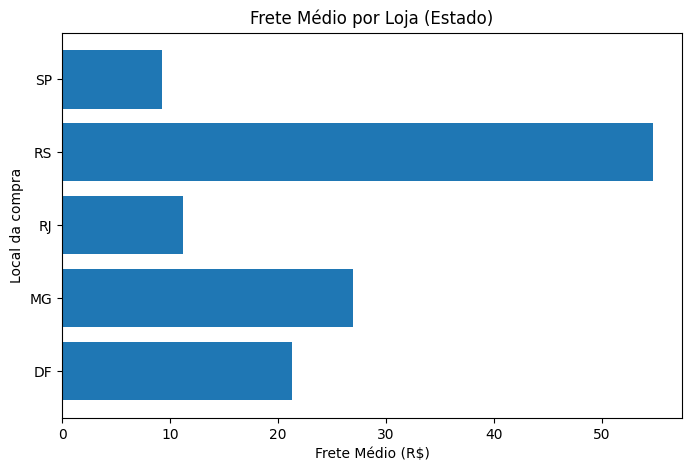

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.barh(frete_medio.index, frete_medio.values)
plt.xlabel("Frete Médio (R$)")
plt.ylabel("Local da compra")
plt.title("Frete Médio por Loja (Estado)")
plt.show()


## Relatório

---



Analisando os resultados e graficos, chegamos na conclusão final que o melhor a se fazer e vender a loja do Rj(Rio de Janeiro), pois entre todas elas a do Rj foi que apresentou piores resultados.

Ela teve a pior AVALIAÇÃO, FATURAMENTO e a pior satisfação do cliente, tornando o futuro da loja bem preocupante.

In [34]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [35]:
df.to_csv("/content/drive/MyDrive/Colab Notebooks/faturamento.csv", index=False)
